Testing the difference between differend algorithms

In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from utils.plot import *

Loading data

In [3]:
BASE_PATH = '../results/lenet_tanh_compress_50_2/'
SAVE_FILES = {
    'RND': 'lenet_RND_save.csv',
    'PSO': 'lenet_PSO_save.csv',
    'GA': 'lenet_GA_save.csv',
}

In [4]:
data = {
    'run': [],
    'RND': [],
    'PSO': [],
    'GA': [],
}

data2 = {
    'RND': {
        'run': [],
        'accuracy': [],
        'accuracy_loss': [],
        'cr': [],
        'fitness':[]
    },
    'PSO': {
        'run': [],
        'accuracy': [],
        'accuracy_loss': [],
        'cr': [],
        'fitness':[]
    },
    'GA': {
        'run': [],
        'accuracy': [],
        'accuracy_loss': [],
        'cr': [],
        'fitness':[]
    },
}

for dir in os.listdir(BASE_PATH):
    data['run'].append(dir)
    for key in SAVE_FILES.keys():
        save_df = pd.read_csv(os.path.join(BASE_PATH, dir, SAVE_FILES[key]))

        data_row = (save_df[save_df['fitness'] == save_df['fitness'].max()]).iloc[0]
        data2[key]['run'].append(dir)
        data2[key]['accuracy'].append(data_row['accuracy'])
        data2[key]['accuracy_loss'].append(data_row['accuracy_loss'])
        data2[key]['cr'].append(data_row['compression'])
        data2[key]['fitness'].append(data_row['fitness'])

        data[key].append(save_df['fitness'].max())

data = pd.DataFrame(data)
data

,run,RND,PSO,GA
0,run7,4.215706,4.057437,3.594396
1,run3,2.828726,5.620736,4.071803
2,run4,2.896924,3.912902,5.301825
3,run10,2.653549,5.256936,5.325308
4,run2,3.544170,3.973081,4.231062
5,run8,3.617163,3.529452,4.292733
6,run9,2.867703,3.062985,3.767525
7,run11,2.941439,5.257415,4.700065
8,run1,2.890701,5.046410,4.201676
9,run5,3.552033,5.309783,4.573207


In [5]:
data2 = pd.DataFrame(data2['PSO'])
data2

,run,accuracy,accuracy_loss,cr,fitness
0,run7,0.9754,0.0110,17.728796,4.057437
1,run3,0.9826,0.0038,17.332079,5.620736
2,run4,0.9826,0.0038,14.630711,3.912902
3,run10,0.9830,0.0034,16.463608,5.256936
4,run2,0.9750,0.0114,17.475277,3.973081
5,run8,0.9752,0.0112,15.533805,3.529452
6,run9,0.9736,0.0128,14.542666,3.062985
7,run11,0.9814,0.0050,17.283855,5.257415
8,run1,0.9804,0.0060,17.474703,5.046410
9,run5,0.9816,0.0048,17.277128,5.309783


In [6]:
data = {
    'run': [],
    'RND': [],
    'PSO': [],
    'GA': [],
}

for dir in os.listdir(BASE_PATH):
    data['run'].append(dir)
    for key in SAVE_FILES.keys():
        save_df = pd.read_csv(os.path.join(BASE_PATH, dir, SAVE_FILES[key]))
        data[key].append(save_df['fitness'].max())

data = pd.DataFrame(data)
data

,run,RND,PSO,GA
0,run7,4.215706,4.057437,3.594396
1,run3,2.828726,5.620736,4.071803
2,run4,2.896924,3.912902,5.301825
3,run10,2.653549,5.256936,5.325308
4,run2,3.544170,3.973081,4.231062
5,run8,3.617163,3.529452,4.292733
6,run9,2.867703,3.062985,3.767525
7,run11,2.941439,5.257415,4.700065
8,run1,2.890701,5.046410,4.201676
9,run5,3.552033,5.309783,4.573207


Print graph

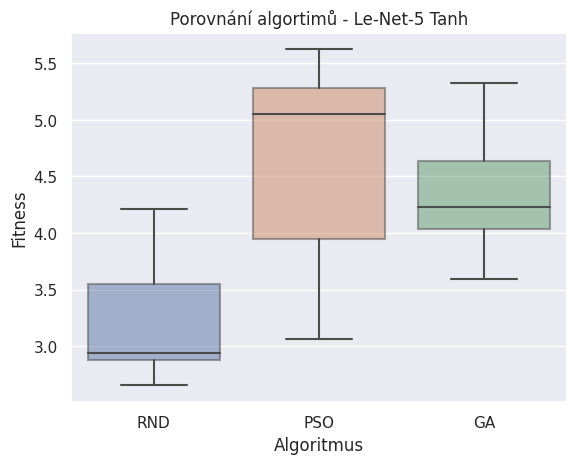

In [7]:
sns.set(style="darkgrid")
graph = sns.boxplot(data=data, boxprops=dict(alpha=0.5)) #  medianprops={"color": "coral"}
graph.set(xlabel = 'Algoritmus', ylabel='Fitness', title='Porovnání algortimů - Le-Net-5 Tanh')
graph.get_figure().savefig('../results/plots/box2.pdf')

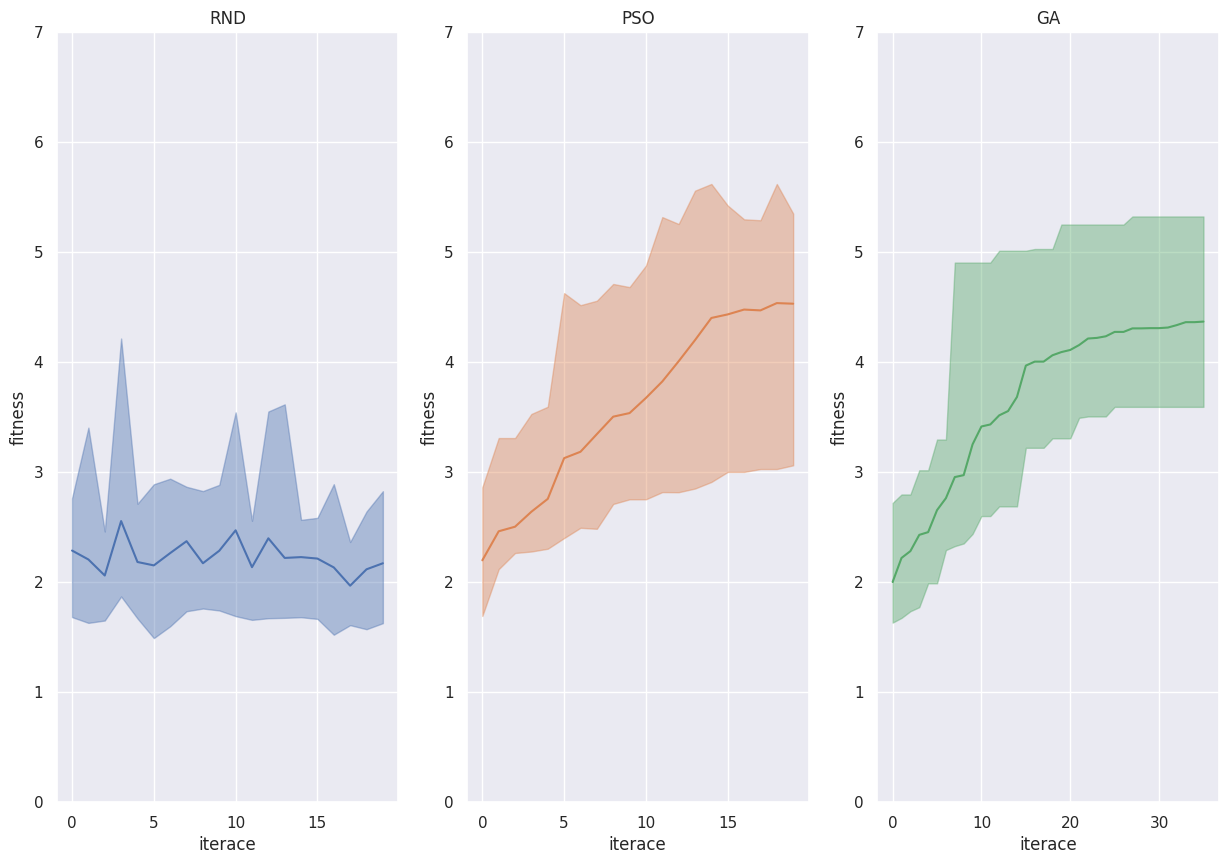

In [8]:
files = {
    'RND': [],
    'PSO': [],
    'GA': [],
}

for key in files.keys():
    for i in range(1, 12):
        files[key].append(f'{BASE_PATH}run{i}/lenet_{key}_save.csv')

plot_optimalization_progress(files)
plt.savefig('../results/plots/line2.pdf')

Showing performance graphs

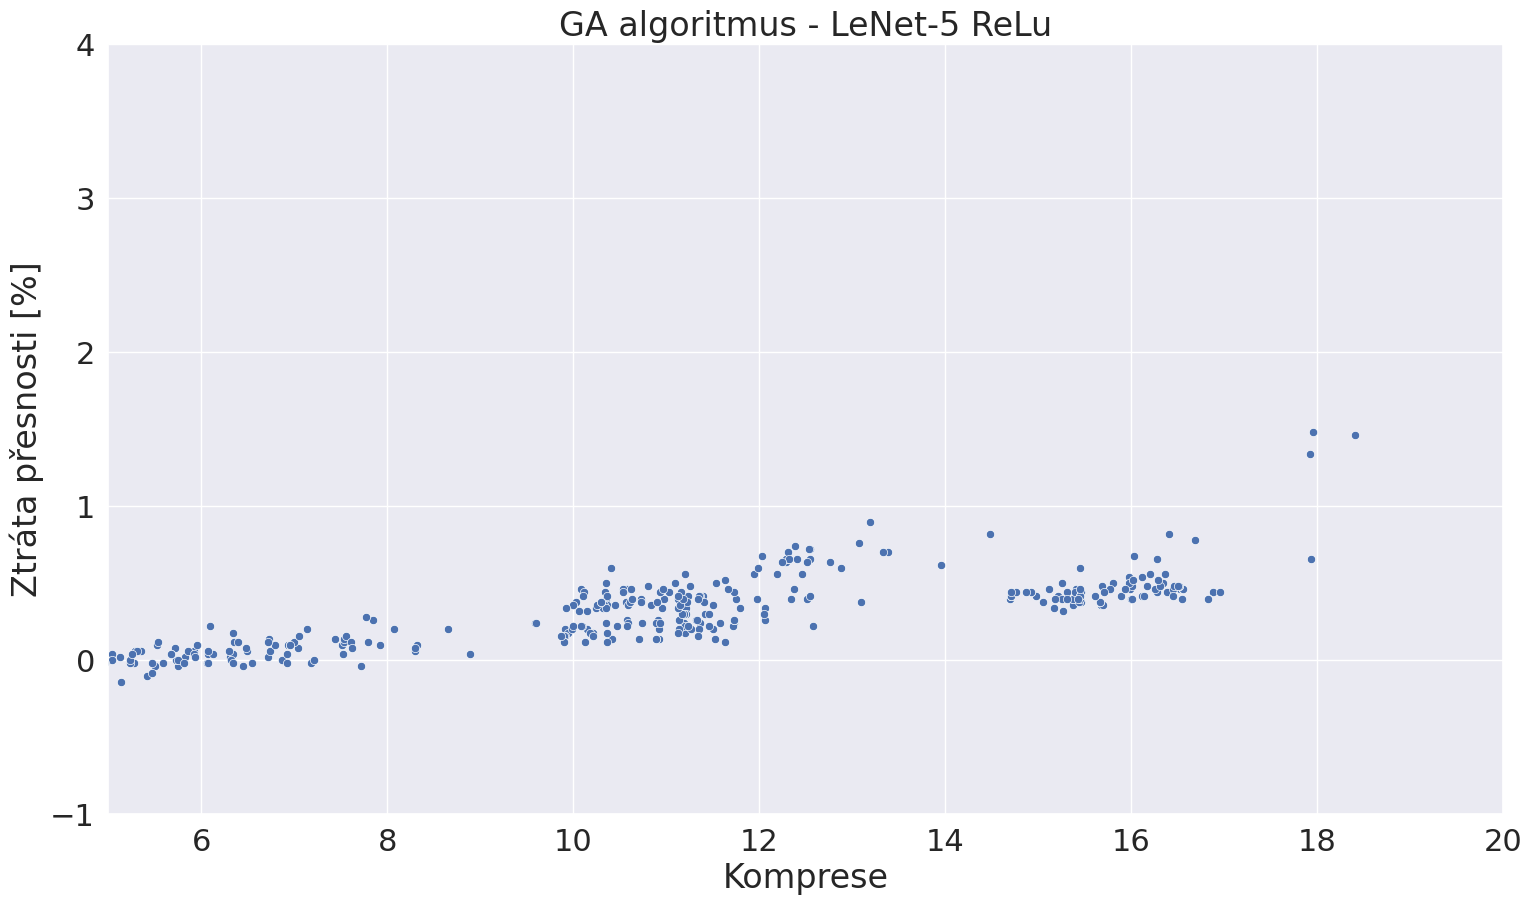

In [9]:
#plt_data = pd.read_csv('../results/lenet_tanh_compress_50/run10/lenet_PSO_save.csv')
#plt_data = pd.read_csv('../results/lenet_relu_compress_50/run8/lenet_PSO_save.csv')
#plt_data = pd.read_csv('../results/lenet_relu_compress_50/run9/lenet_GA_save.csv')
plt_data = pd.read_csv('../results/lenet_tanh_compress_50_2/run10/lenet_GA_save.csv')

plot_alcr(plt_data, False)
plt.title('GA algoritmus - LeNet-5 ReLu')
plt.xlabel('Komprese')
plt.ylabel('Ztráta přesnosti [%]')
plt.savefig('../results/plots/scatter2.pdf')